Feature Scaling has 2 parts:
1. Standardization
2. Normalization

# <center>Standardization</center>

also called Z-score Normalization

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df = df.iloc[:,2:]

In [4]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [5]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

# Train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [8]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

# Standard Scaler

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)


# transform train and test sets
X_train_scaled = scaler.transform(X_train) # this returns in numpy array
X_test_scaled = scaler.transform(X_test) # this returns in numpy array


In [11]:
scaler.mean_

array([3.7800e+01, 6.9675e+04])

In [12]:
X_train.head() # this is before dataset

,Age,EstimatedSalary
323,48,30000
279,50,36000
239,53,143000
10,26,80000
340,53,104000


In [13]:
X_train_scaled # this is after standard scaling (mean of all values is 0)

array([[ 0.98721198, -1.15702833],
       [ 1.18078296, -0.9820524 ],
       [ 1.47113942,  2.13835166],
       [-1.14206876,  0.30110441],
       [ 1.47113942,  1.00100812],
       [-0.56135583,  1.38012263],
       [-1.04528328, -0.45712461],
       [ 0.69685552, -1.27367894],
       [ 2.05185236,  0.38859237],
       [ 0.89042649, -1.3028416 ],
       [ 2.14863784,  0.38859237],
       [-0.17421388, -0.57377523],
       [ 1.85828138, -1.06954036],
       [ 1.95506687,  0.73854423],
       [-0.36778486, -0.77791381],
       [ 0.89042649, -0.54461258],
       [ 1.85828138, -0.28214868],
       [ 0.40649905,  0.00947786],
       [ 0.40649905,  1.00100812],
       [ 2.05185236, -0.80707647],
       [-0.8517123 ,  0.30110441],
       [ 1.95506687, -0.6612632 ],
       [ 0.79364101,  0.35942972],
       [-1.14206876, -1.56530549],
       [-0.8517123 ,  0.15529114],
       [ 0.89042649, -0.57377523],
       [-0.94849779,  0.41775503],
       [-0.27099937, -0.36963665],
       [ 0.0193571 ,

In [14]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [15]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,-0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,-0.0
75%,1.0,1.0
max,2.0,2.0


# Effect of Scaling

Text(0.5, 1.0, 'After Scaling')

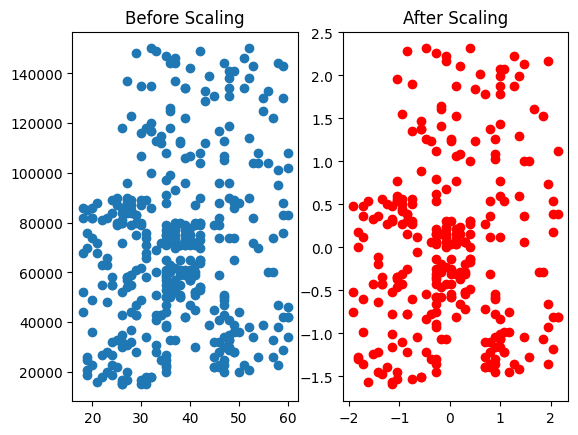

In [16]:
plt.subplot(1,2,1)
plt.scatter(df['Age'], df['EstimatedSalary'])
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='r')
plt.title('After Scaling')


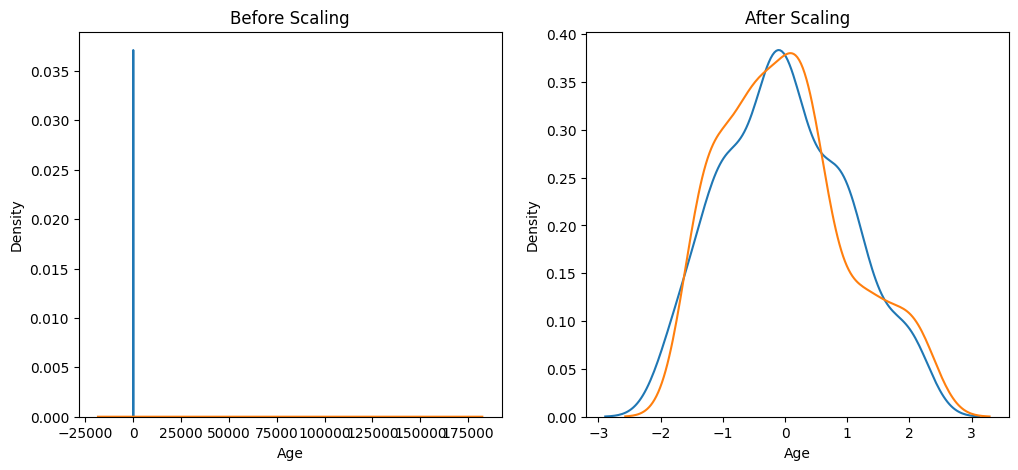

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after Scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

# Comparision of Distributions

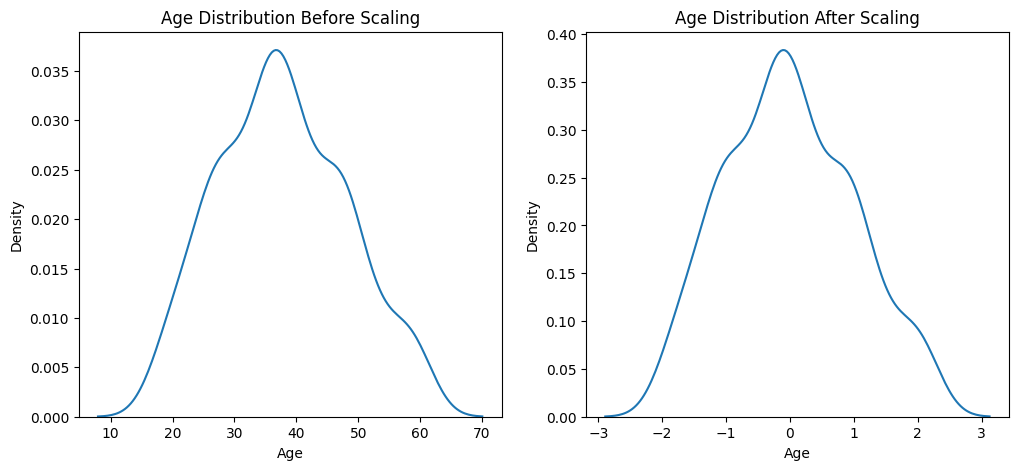

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))

# before Scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)

plt.show()

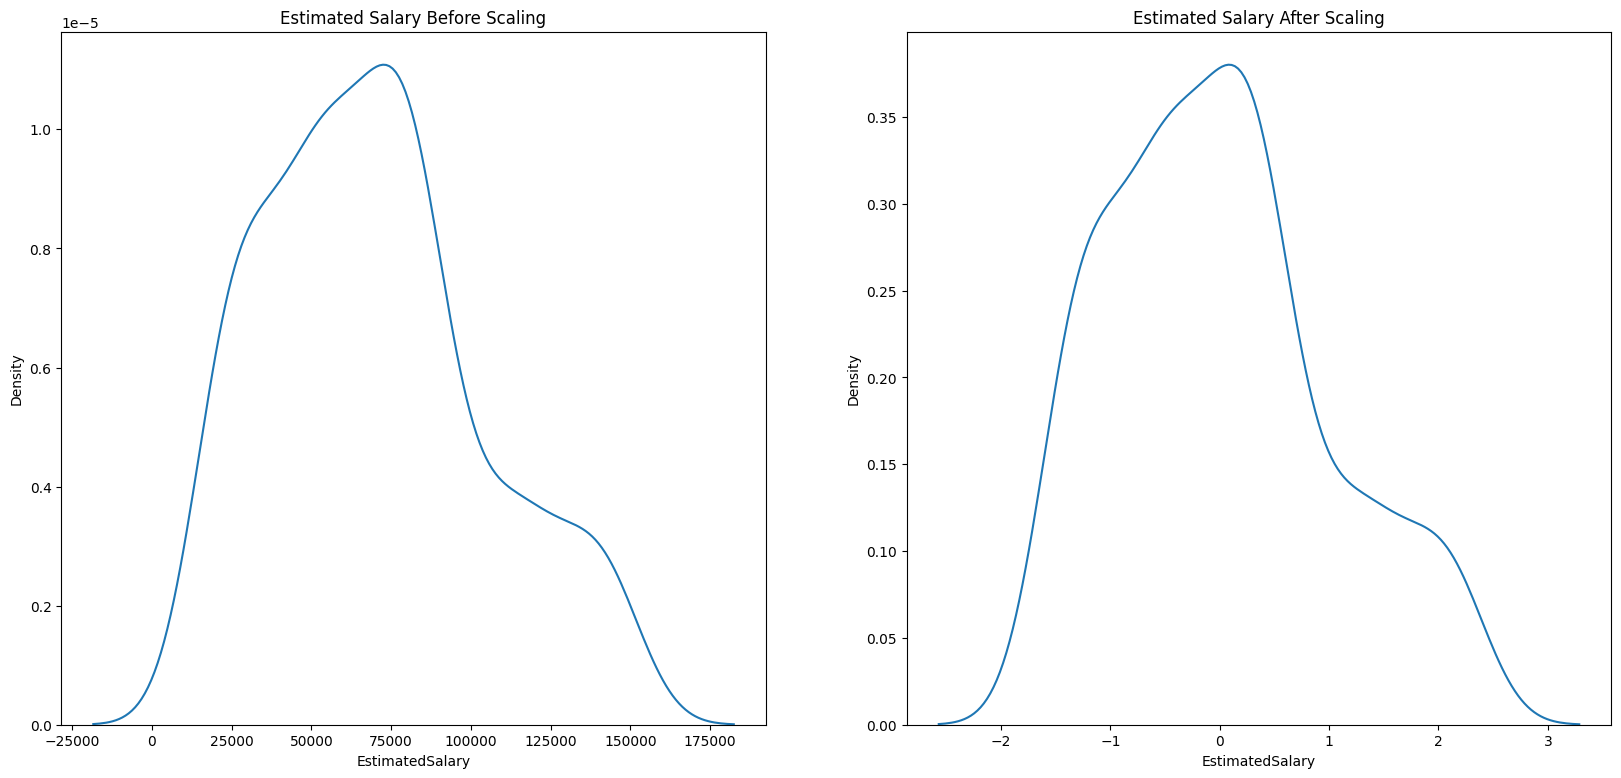

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize= (20,9))

# before scaling
ax1.set_title('Estimated Salary Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Estimated Salary After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

plt.show()

# Why Scaling is Important

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [22]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print("Actual", accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.8916666666666667
Scaled 0.9


**another example**

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [33]:
dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [34]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [36]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled)) # show no changes in Decision Tree

Actual 0.8666666666666667
Scaled 0.8583333333333333


# Why to use Standardization

<img src='static/why to use standardization.png'>